 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [375]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [376]:
# Reading whale returns
whale_returns_path = Path('../Starter_Code/Resources/whale_returns.csv')
whale_returns_df = pd.read_csv(whale_returns_path)
whale_returns_df.head(10)


,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
6,2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
7,2015-03-11,0.004012,0.005163,0.003312,-0.001147
8,2015-03-12,0.008265,0.010272,0.013117,0.010801
9,2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142


In [377]:
# Count nulls
whale_null_counts = whale_returns_df.isnull().sum()
whale_null_counts

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [378]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()
whale_returns_df





,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [379]:
# Reading algorithmic returns
algo_returns_path = Path('../Starter_Code/Resources/algo_returns.csv')
algo_returns_df = pd.read_csv(algo_returns_path)
algo_returns_df.head(10)


,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
5,2014-06-04,-0.001838,NaN
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735


In [380]:
# Count nulls
algo_null_count = algo_returns_df.isnull().sum()
algo_null_count

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [381]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()
algo_returns_df


,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [382]:
# Reading S&P 500 Closing Prices
SP500_path = Path('../Starter_Code/Resources/sp500_history.csv')
SP500_df = pd.read_csv(SP500_path)
SP500_df.head(10)


,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06
5,15-Apr-19,$2905.58
6,12-Apr-19,$2907.41
7,11-Apr-19,$2888.32
8,10-Apr-19,$2888.21
9,9-Apr-19,$2878.20


In [383]:
# Check Data Types
SP500_data_types = SP500_df.dtypes
SP500_data_types

Date     object
Close    object
dtype: object

In [384]:
# Fix Data Types 
# Converting Date to DateTime object specifying format because had a warning about falling back to dateutil
SP500_df['Date'] = pd.to_datetime(SP500_df['Date'], format='%d-%b-%y') 
SP500_df.set_index('Date', inplace=True) # set index

# Clean and convert 'Close' to numeric float for calculations. Using string replace to strip the $ sign
SP500_df['Close'] = SP500_df['Close'].str.replace('$', '').astype(float) 
SP500_df.head(10)

#notice that setting the Date as an index of the DataFrame will have the `Date` on a different row from the `Close`

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
2019-04-15,2905.58
2019-04-12,2907.41
2019-04-11,2888.32
2019-04-10,2888.21


In [385]:
# Calculate Daily Returns
SP500_df['Close'] = SP500_df['Close'].pct_change()
SP500_df

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [386]:
# Drop nulls
SP500_df = SP500_df.dropna()
SP500_df

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [449]:
# Rename `Close` Column to be specific to this portfolio.
SP500_df= SP500_df.rename(columns={'Close': 'SP500'})
SP500_df.tail(10)



,SP500
Date,
2012-10-12,-0.008013
2012-10-11,0.002975
2012-10-10,-0.000195
2012-10-09,0.006227
2012-10-08,0.009990
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123
2012-10-02,-0.003611


## Combine Whale, Algorithmic, and S&P 500 Returns

In [388]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
# check whale returns data type and convert Date to datetime
whale_returns_df.dtypes
whale_returns_df['Date'] = pd.to_datetime(whale_returns_df['Date'])
whale_returns_df.set_index('Date', inplace=True) # set index
whale_returns_df

#convert algo Date to datetime
algo_returns_df['Date'] = pd.to_datetime(algo_returns_df['Date'])
algo_returns_df.set_index('Date', inplace=True) # set index
algo_returns_df

#Combine Whale, Algo, SP500
combined_daily_returns_df = pd.merge(pd.merge(whale_returns_df, algo_returns_df, left_index=True, right_index=True, how='inner'), SP500_df, left_index=True, right_index=True, how='inner')
combined_daily_returns_df.head(10)










,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.012445
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.006112
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.013353


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

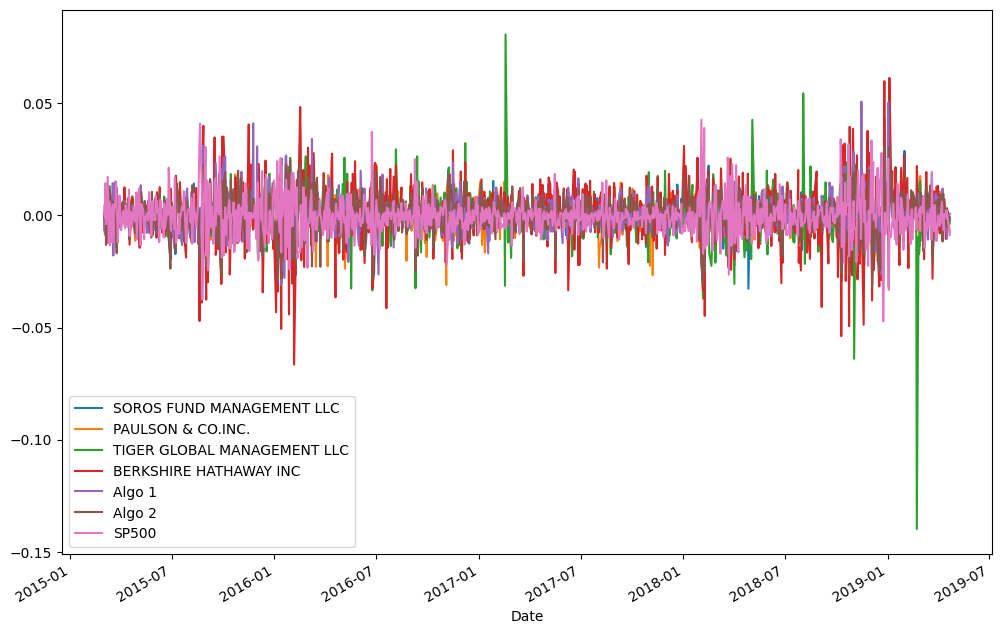

In [389]:
# Plot daily returns of all portfolios
combined_daily_returns_df.plot(figsize=(12,8))



#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative Returns of all portfolios'}, xlabel='Date'>

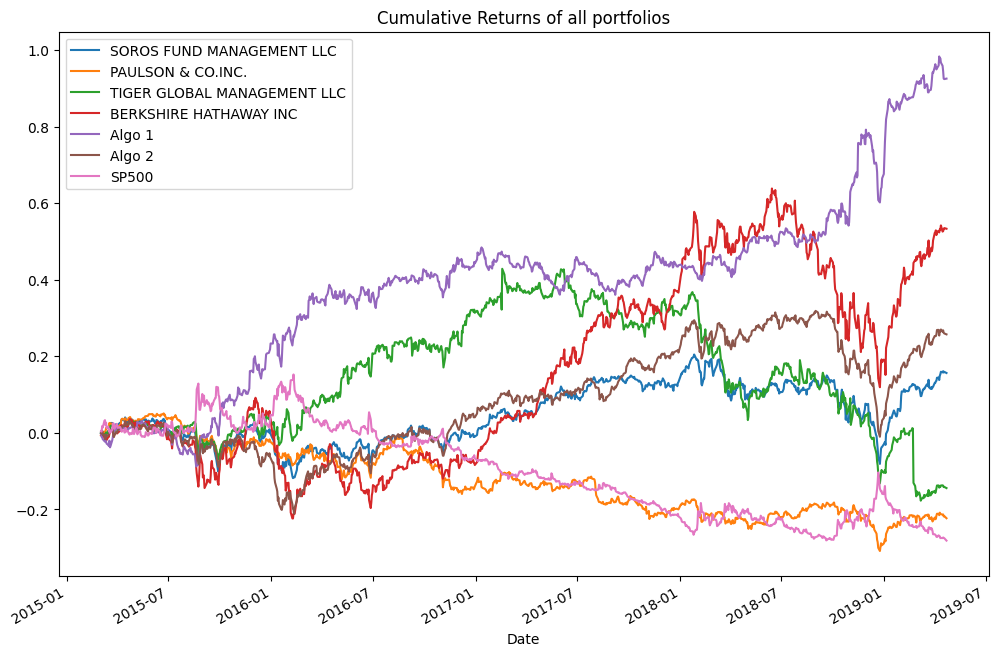

In [390]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_daily_returns_df).cumprod() - 1
cumulative_returns

# Plot cumulative returns
cumulative_returns.plot(figsize=(12,8),title="Cumulative Returns of all portfolios")


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


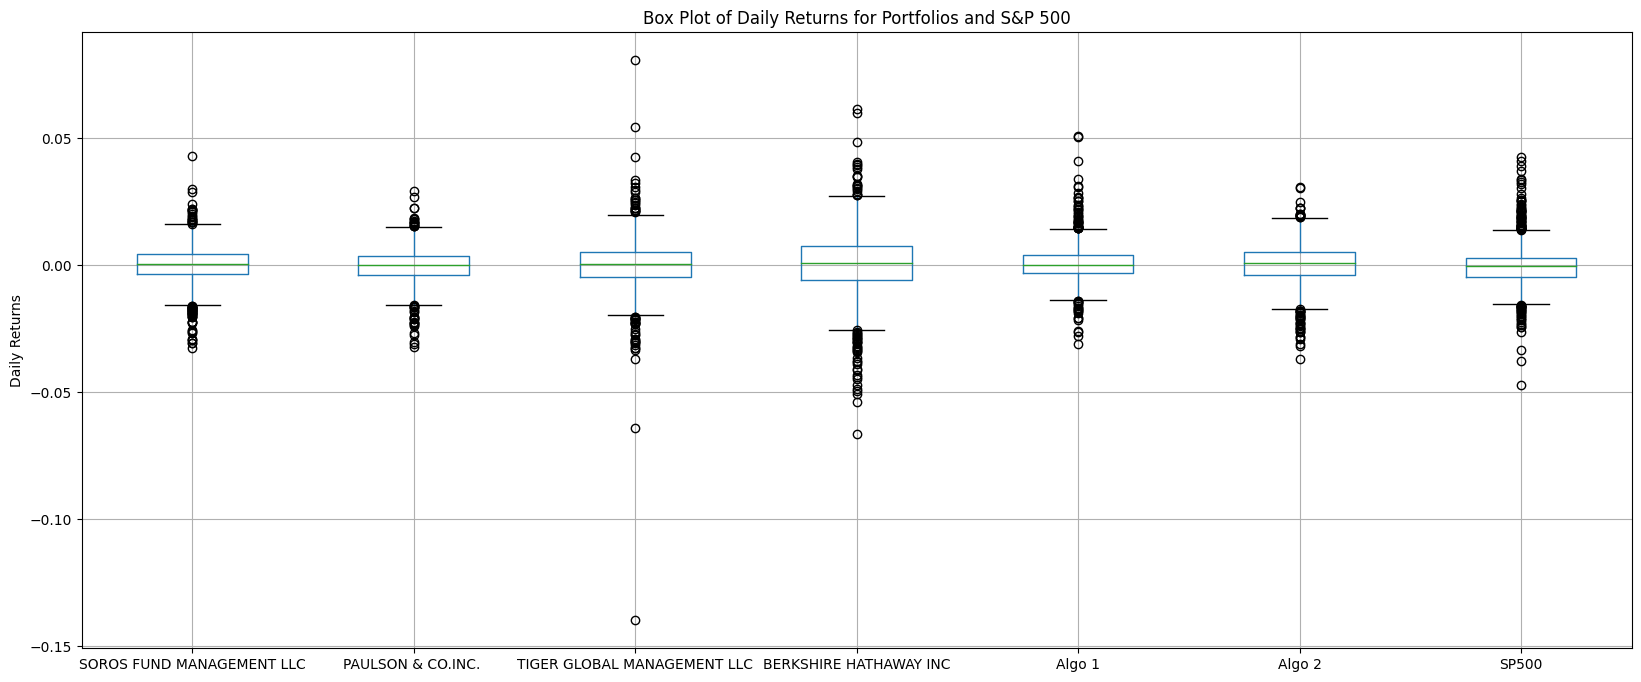

In [391]:
# Box plot to visually show risk
import matplotlib.pyplot as plt
combined_daily_returns_df.columns

combined_daily_returns_df[['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'SP500']].boxplot(figsize=(20,8))
plt.title('Box Plot of Daily Returns for Portfolios and S&P 500')
plt.ylabel('Daily Returns')
plt.show()




### Calculate Standard Deviations

In [392]:
# Calculate the daily standard deviations of all portfolios
daily_std_dev = combined_daily_returns_df.std()
daily_std_dev



SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500                          0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [393]:
# Calculate  the daily standard deviation of S&P 500
daily_std_dev_SP500 = combined_daily_returns_df['SP500'].std()
daily_std_dev_SP500


# Determine which portfolios are riskier than the S&P 500
riskier_portfolios = daily_std_dev[daily_std_dev > daily_std_dev_SP500]
riskier_portfolios
print(f"The following portfolios are riskier than S&P 500 :\n{riskier_portfolios}")


The following portfolios are riskier than S&P 500 :
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


### Calculate the Annualized Standard Deviation

In [394]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_dev = daily_std_dev # (252 ** 0.5)
annualized_std_dev


SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500                          0.008587
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-31                   0.005764            0.004641   
2015-04-01                   0.005744            0.004467   
2015-04-02                   0.005749            0.004502   
2015-04-06                   0.005792            0.004492   
2015-04-07                   0.005452            0.004385   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-31                     0.006731                0.007108  0.007866   
2015-04-01                     0.006750                0.007005  0.007886   
2015-04-02                     0.006739                0.006958  0.007601   
2015-04-06                     0.006786                0.006884  0.007648   
2015-04-07                     0.006486                0.006193  0.007531   

              Algo 2     SP500  

<Axes: xlabel='Date'>

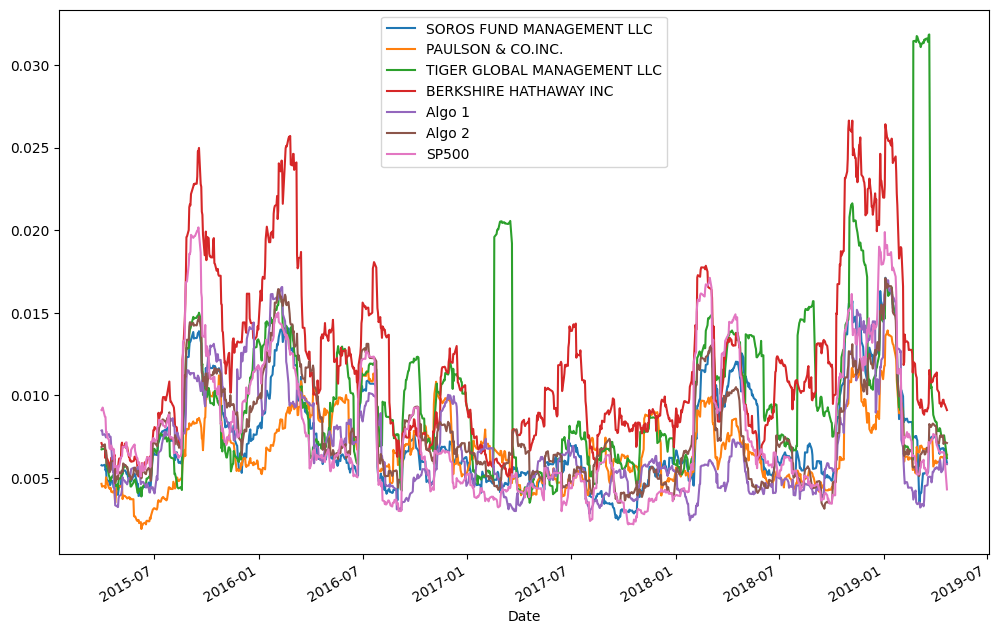

In [395]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_deviation = combined_daily_returns_df.rolling(window=21).std().dropna()
print(rolling_std_deviation.head())


# Plot the rolling standard deviation
rolling_std_deviation.plot(figsize=(12,8))


### Calculate and plot the correlation

<Axes: >

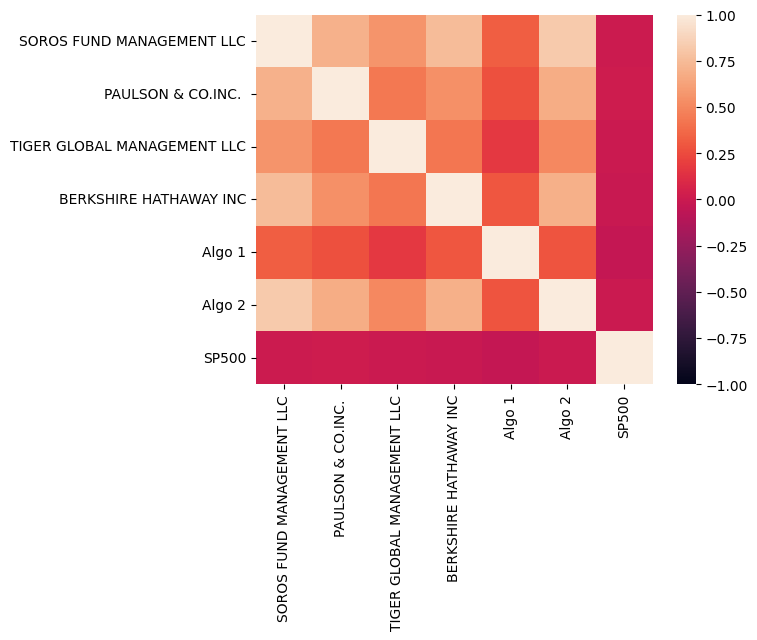

In [396]:
# Calculate the correlation
price_correlation = combined_daily_returns_df.corr()
price_correlation


# Display the correlation matrix
#will use heatmap to display this

sns.heatmap(price_correlation, vmin=-1, vmax=1)


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

Covariance between Algo 2 and S&P 500: -0.00000016
variance of S&P 500: 7.373467552840442e-05
beta of Algo 2 : -0.00212923773658764


<Axes: title={'center': 'Algo 2 vs Market Returns - Beta: -0.00212924'}, xlabel='Algo 2', ylabel='SP500'>

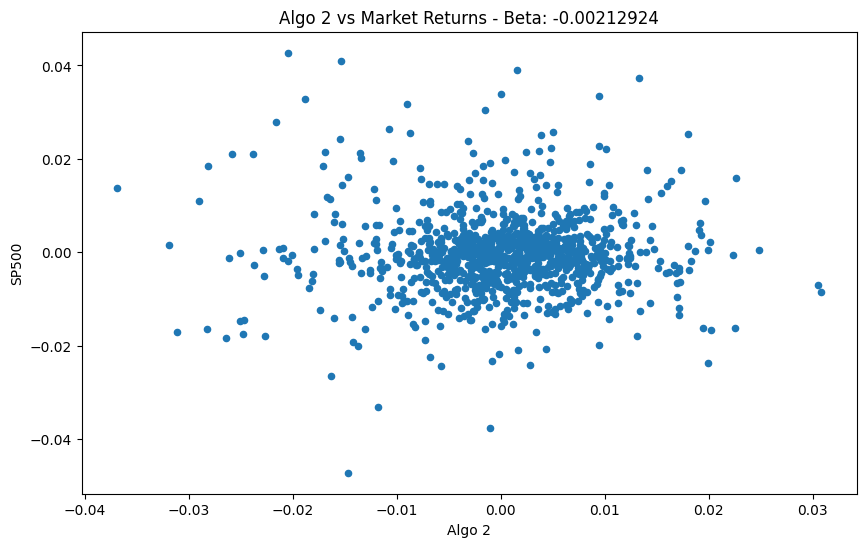

In [445]:

# Calculate covariance of a single portfolio
covariance = combined_daily_returns_df['Algo 2'].cov(combined_daily_returns_df['SP500'])
covariance
print(f"Covariance between Algo 2 and S&P 500: {covariance:.8f}")

# Calculate variance of S&P 500
variance_SP500 = combined_daily_returns_df['SP500'].var()
print(f"variance of S&P 500: {variance_SP500}")

# Computing beta of 'Algo 2' which is benchmarked against S&P 500 index.
algo2_beta = covariance / variance_SP500
algo2_beta
print(f"beta of Algo 2 : {algo2_beta}")

#plot trend
combined_daily_returns_df.plot(figsize=(10, 6), kind='scatter', x='Algo 2', y='SP500', title=f"Algo 2 vs Market Returns - Beta: {algo2_beta:.8f}")




## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [398]:
# Use `ewm` to calculate the rolling window
ema_std = combined_daily_returns_df.ewm(halflife=21).std().dropna()
ema_std



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003962
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.007961
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.008178
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.009475
2015-03-10,0.005816,0.004707,0.006864,0.007841,0.002947,0.007315,0.008607
...,...,...,...,...,...,...,...
2019-04-15,0.007755,0.006960,0.016572,0.012136,0.006880,0.008065,0.007823
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938,0.007721
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896,0.007595


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [399]:
# Annualized Sharpe Ratios
average_daily_returns = combined_daily_returns_df.mean()
std_daily_returns = combined_daily_returns_df.std()

# calculate Sharpe Ratios
sharpe_ratio = (average_daily_returns / std_daily_returns) * np.sqrt(252)
sharpe_ratio



SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500                         -0.518582
dtype: float64

<Axes: >

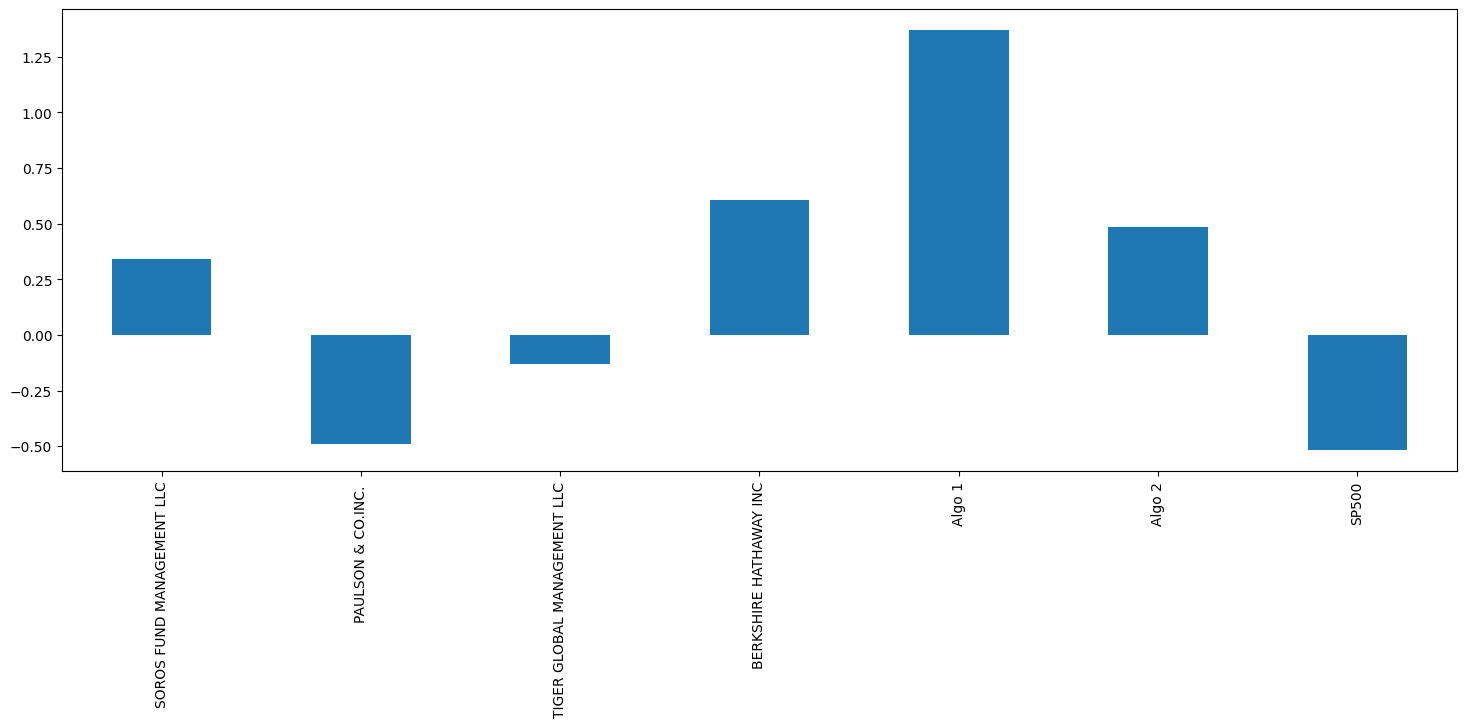

In [400]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(figsize=(18,6), kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Both Algo 1 and Algo 2 seem to have positive Sharpe ratio of 1.369589 and 0.484334 respectively. This indicates potential outperformance relative to the risk taken. S&P500 has a negative Sharpe Ratio 
which indicates that it may not have provided excess return for the amount of risk taken during the period being analyzed. Ago 1 and 2  outpeformed both the market and Whale apart from Berkshire Hathaway Inc which had a higher Sharpe Ratio than Algo 2

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [401]:
# Reading data from 1st stock AAPL and set Trade DATE as index
aapl_hist_file_path = Path('../Starter_Code/Resources/aapl_historical.csv')
aapl_df = pd.read_csv(aapl_hist_file_path, index_col="Trade DATE", parse_dates=True)
aapl_df.head()

#




,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [402]:
# Reading data from 2nd stock COST and set Trade DATE as index
cost_hist_file_path = Path('../Starter_Code/Resources/cost_historical.csv')
cost_df = pd.read_csv(cost_hist_file_path, index_col="Trade DATE", parse_dates=True)
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [403]:
# Reading data from 3rd stock GOOG and set Trade DATE as index
goog_hist_file_path = Path('../Starter_Code/Resources/goog_historical.csv')
goog_df = pd.read_csv(goog_hist_file_path, index_col="Trade DATE", parse_dates=True)
goog_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [404]:
# Combine all stocks in a single DataFrame
aapl_cost_goog_combined_df = pd.concat([aapl_df,cost_df, goog_df], axis="columns", join="inner")
aapl_cost_goog_combined_df

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,COST,243.47,GOOG,1162.38
2019-05-08,AAPL,202.90,COST,241.34,GOOG,1166.27
2019-05-07,AAPL,202.86,COST,240.18,GOOG,1174.10
2019-05-06,AAPL,208.48,COST,244.23,GOOG,1189.39
2019-05-03,AAPL,211.75,COST,244.62,GOOG,1185.40
...,...,...,...,...,...,...
2018-05-17,AAPL,186.99,COST,199.60,GOOG,1078.59
2018-05-16,AAPL,188.18,COST,198.71,GOOG,1081.77
2018-05-15,AAPL,186.44,COST,195.48,GOOG,1079.23


In [405]:
# Reset Date index
# Index set when reading file, put a condition here to check if index is not set, set index

if aapl_cost_goog_combined_df.index is None:
    aapl_cost_goog_combined_df.set_index('Trade Date', inplace=True)
aapl_cost_goog_combined_df.index


DatetimeIndex(['2019-05-09', '2019-05-08', '2019-05-07', '2019-05-06',
               '2019-05-03', '2019-05-02', '2019-05-01', '2019-04-30',
               '2019-04-29', '2019-04-26',
               ...
               '2018-05-24', '2018-05-23', '2018-05-22', '2018-05-21',
               '2018-05-18', '2018-05-17', '2018-05-16', '2018-05-15',
               '2018-05-14', '2018-05-11'],
              dtype='datetime64[ns]', name='Trade DATE', length=250, freq=None)

In [406]:
# Reorganize portfolio data by having a column per symbol
# drop extra columns and rename remaining columns as Symbols
aapl_cost_goog_combined_df.drop(columns=['Symbol'], inplace=True)
aapl_cost_goog_combined_df

#rename NOCPs to AAPL, COST, GOOG
aapl_cost_goog_combined_df.columns = ['AAPL','COST','GOOG']
aapl_cost_goog_combined_df = aapl_cost_goog_combined_df.rename_axis(index={'Trade DATE':'Date'})
aapl_cost_goog_combined_df







,AAPL,COST,GOOG
Date,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40
...,...,...,...
2018-05-17,186.99,199.60,1078.59
2018-05-16,188.18,198.71,1081.77
2018-05-15,186.44,195.48,1079.23


In [407]:
# Calculate daily returns
aapl_cost_goog_combined_returns = aapl_cost_goog_combined_df.pct_change()
aapl_cost_goog_combined_returns

# Drop NAs
aapl_cost_goog_combined_returns = aapl_cost_goog_combined_df.pct_change().dropna()


# Display sample data
aapl_cost_goog_combined_returns


,AAPL,COST,GOOG
Date,,,
2019-05-08,0.010861,-0.008749,0.003347
2019-05-07,-0.000197,-0.004806,0.006714
2019-05-06,0.027704,0.016862,0.013023
2019-05-03,0.015685,0.001597,-0.003355
2019-05-02,-0.012279,-0.007890,-0.019226
...,...,...,...
2018-05-17,0.003650,0.003217,0.011469
2018-05-16,0.006364,-0.004459,0.002948
2018-05-15,-0.009246,-0.016255,-0.002348


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

Date
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
                ...   
2018-05-17    0.006112
2018-05-16    0.001618
2018-05-15   -0.009283
2018-05-14    0.010216
2018-05-11   -0.000012
Length: 249, dtype: float64


<Axes: title={'center': 'Portfolio Returns'}, xlabel='Date'>

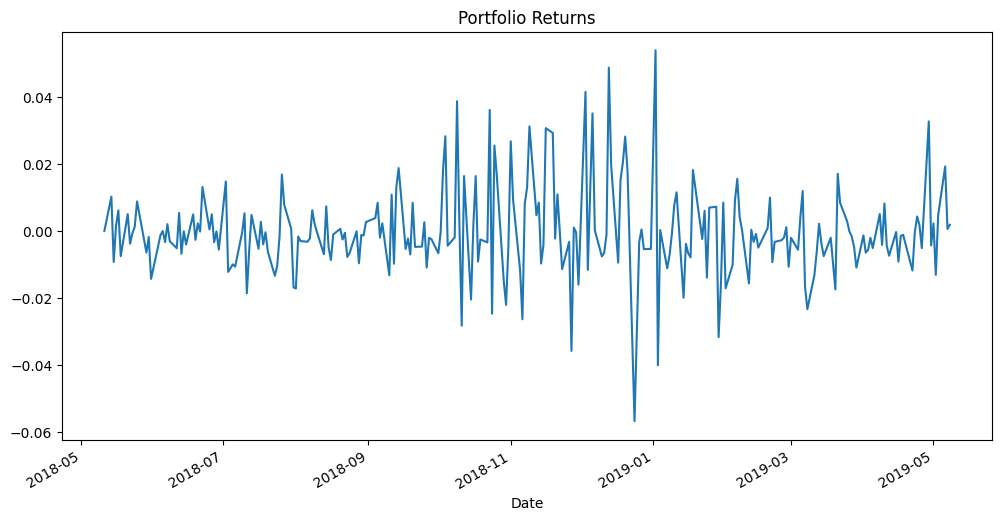

In [408]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_weighted_returns = aapl_cost_goog_combined_returns.dot(weights)



# Display sample data
print(portfolio_weighted_returns)

#plot
portfolio_weighted_returns.plot(figsize=(12,6), title="Portfolio Returns")

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [418]:
# Join your returns DataFrame to the original returns DataFrame
# puzzle? Is this daily returns or the weighted portfolio returns?
combined_returns_df = pd.concat([combined_daily_returns_df, aapl_cost_goog_combined_returns], axis="columns", join="inner")
combined_returns_df



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,AAPL,COST,GOOG
Date,,,,,,,,,,
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,0.002339,-0.000613,-0.001763
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.009172,0.002046,0.019431
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.009246,-0.016255,-0.002348
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.006364,-0.004459,0.002948
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.003650,0.003217,0.011469
...,...,...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.000100,0.004035,-0.004914
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.019101,-0.000896,-0.007449
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.003581,-0.001017,-0.000024


In [419]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns_df = combined_returns_df.dropna()
combined_returns_df



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,AAPL,COST,GOOG
Date,,,,,,,,,,
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,0.002339,-0.000613,-0.001763
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.009172,0.002046,0.019431
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.009246,-0.016255,-0.002348
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.006364,-0.004459,0.002948
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.003650,0.003217,0.011469
...,...,...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.000100,0.004035,-0.004914
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.019101,-0.000896,-0.007449
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.003581,-0.001017,-0.000024


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [420]:
# Calculate the annualized `std`

annualized_combined_std_dev = (combined_returns_df.std()) * (252 * 0.5)
annualized_combined_std_dev



SOROS FUND MANAGEMENT LLC      1.163512
PAULSON & CO.INC.              0.926145
TIGER GLOBAL MANAGEMENT LLC    1.844885
BERKSHIRE HATHAWAY INC         1.959067
Algo 1                         1.060775
Algo 2                         1.104896
SP500                          1.207626
AAPL                           2.388120
COST                           1.715891
GOOG                           2.026897
dtype: float64

### Calculate and plot rolling `std` with 21-day window

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2018-06-11                   0.005235            0.004669   
2018-06-12                   0.005177            0.004675   
2018-06-13                   0.005402            0.004694   
2018-06-14                   0.005469            0.004659   
2018-06-15                   0.005206            0.004564   
...                               ...                 ...   
2019-04-15                   0.006804            0.006225   
2019-04-16                   0.006711            0.006224   
2019-04-17                   0.006773            0.006370   
2019-04-18                   0.006633            0.006303   
2019-04-22                   0.005915            0.006400   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2018-06-11                     0.009125             

<Axes: title={'center': 'Rolling Standard Deviation'}, xlabel='Date'>

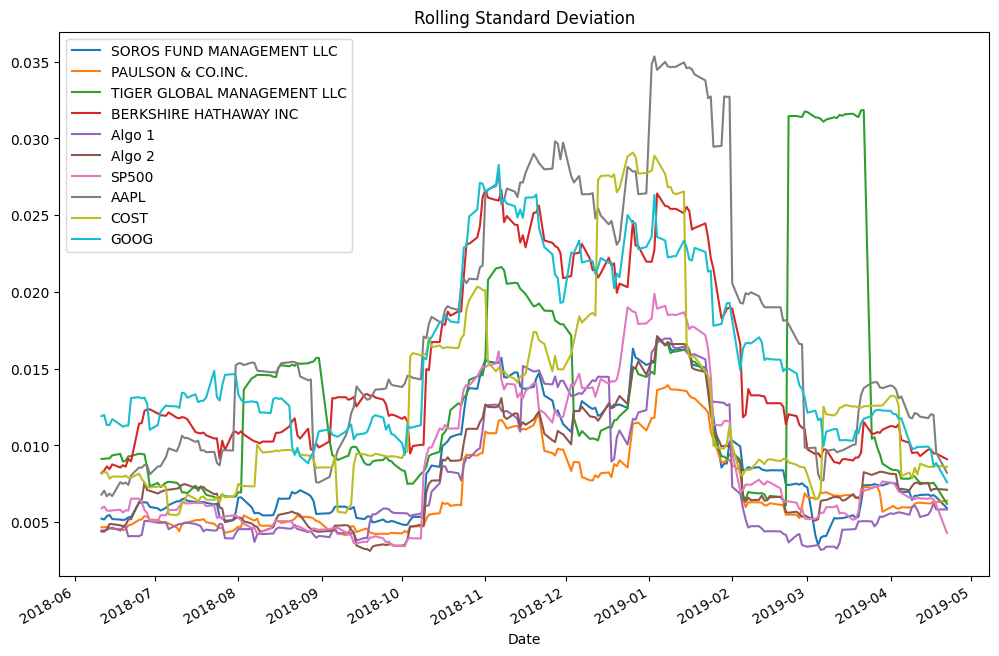

In [446]:
# Calculate rolling standard deviation
rolling_combined_std_deviation = combined_returns_df.rolling(window=21).std().dropna()
print(rolling_combined_std_deviation)

# Plot rolling standard deviation
rolling_combined_std_deviation.plot(figsize=(12,8), title="Rolling Standard Deviation")


### Calculate and plot the correlation

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.791031   
PAULSON & CO.INC.                             0.791031            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.476938            0.484917   
BERKSHIRE HATHAWAY INC                        0.816190            0.650132   
Algo 1                                        0.336890            0.360668   
Algo 2                                        0.861989            0.783856   
SP500                                        -0.028091           -0.059893   
AAPL                                          0.025317            0.036633   
COST                                          0.025258           -0.060523   
GOOG                                          0.102786            0.072375   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.476938   
PAULSON & CO.INC.    

<Axes: >

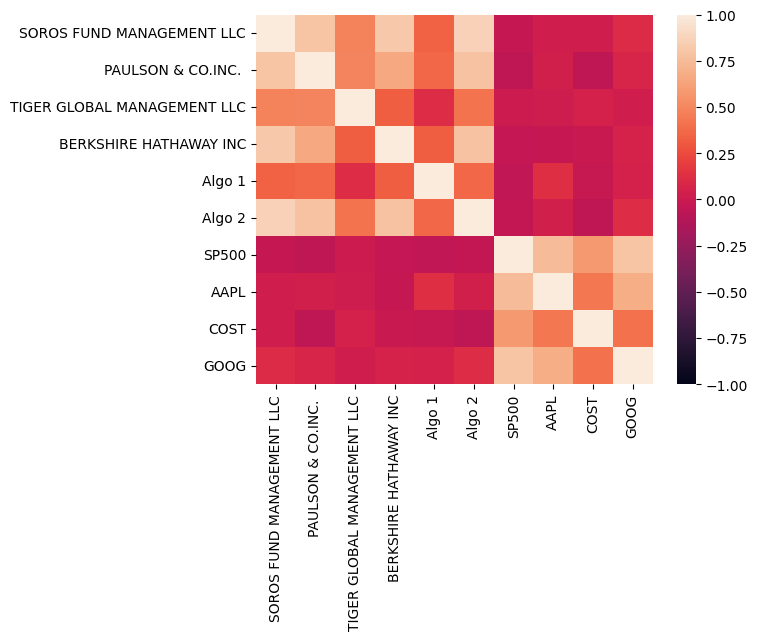

In [430]:
# Calculate and plot the correlation
combined_correlation = combined_returns_df.corr()
print(combined_correlation)

#plot
sns.heatmap(combined_correlation, vmin=-1, vmax=1)




### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': 'Rolling 60-Day Beta of GOOG'}, xlabel='Date'>

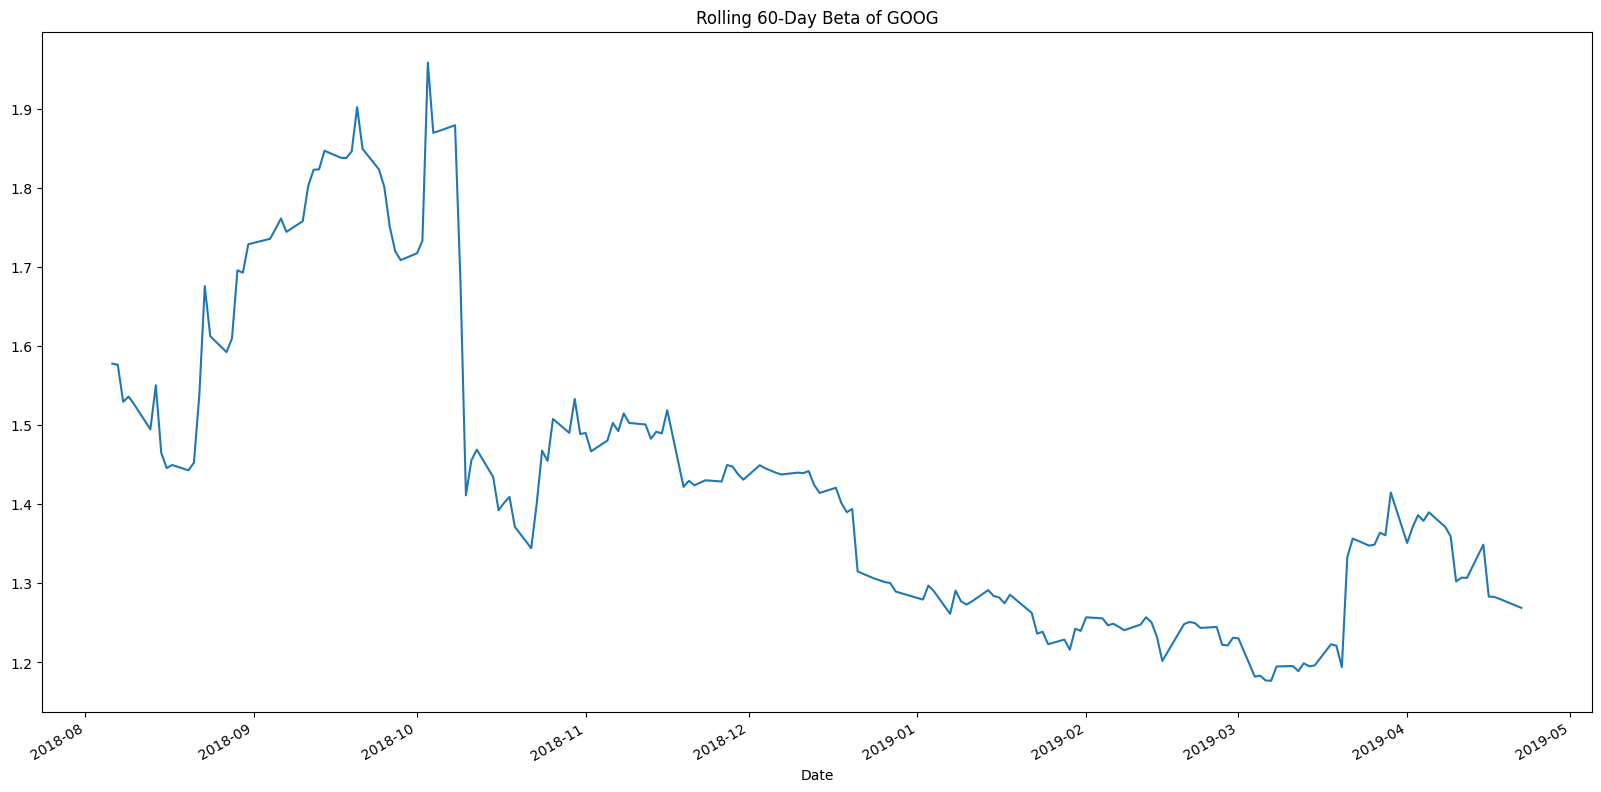

In [435]:
# Calculate and plot Beta
# Rolling beta = rolling covariance / variance
#GOOG

rolling_cov= combined_returns_df['GOOG'].rolling(window=60).cov(combined_returns_df['SP500'])
rolling_cov.dropna()

rolling_var = combined_returns_df['SP500'].rolling(window=60).var()
rolling_var.dropna()

rolling_beta = rolling_cov/rolling_var
rolling_beta

#Plot rolling Beta
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of GOOG')


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [447]:
# Calculate Annualized Sharpe Ratios
# Annualized Sharpe Ratios
average_daily_returns = combined_returns_df.mean()
std_daily_returns = combined_returns_df.std()

# calculate Sharpe Ratios
sharpe_ratio = (average_daily_returns / std_daily_returns) * np.sqrt(252)
sharpe_ratio



SOROS FUND MANAGEMENT LLC      0.344766
PAULSON & CO.INC.              0.236041
TIGER GLOBAL MANAGEMENT LLC   -1.052249
BERKSHIRE HATHAWAY INC         0.085005
Algo 1                         1.999866
Algo 2                         0.009467
SP500                         -0.432942
AAPL                          -0.189008
COST                          -1.008538
GOOG                          -0.459788
dtype: float64

<Axes: >

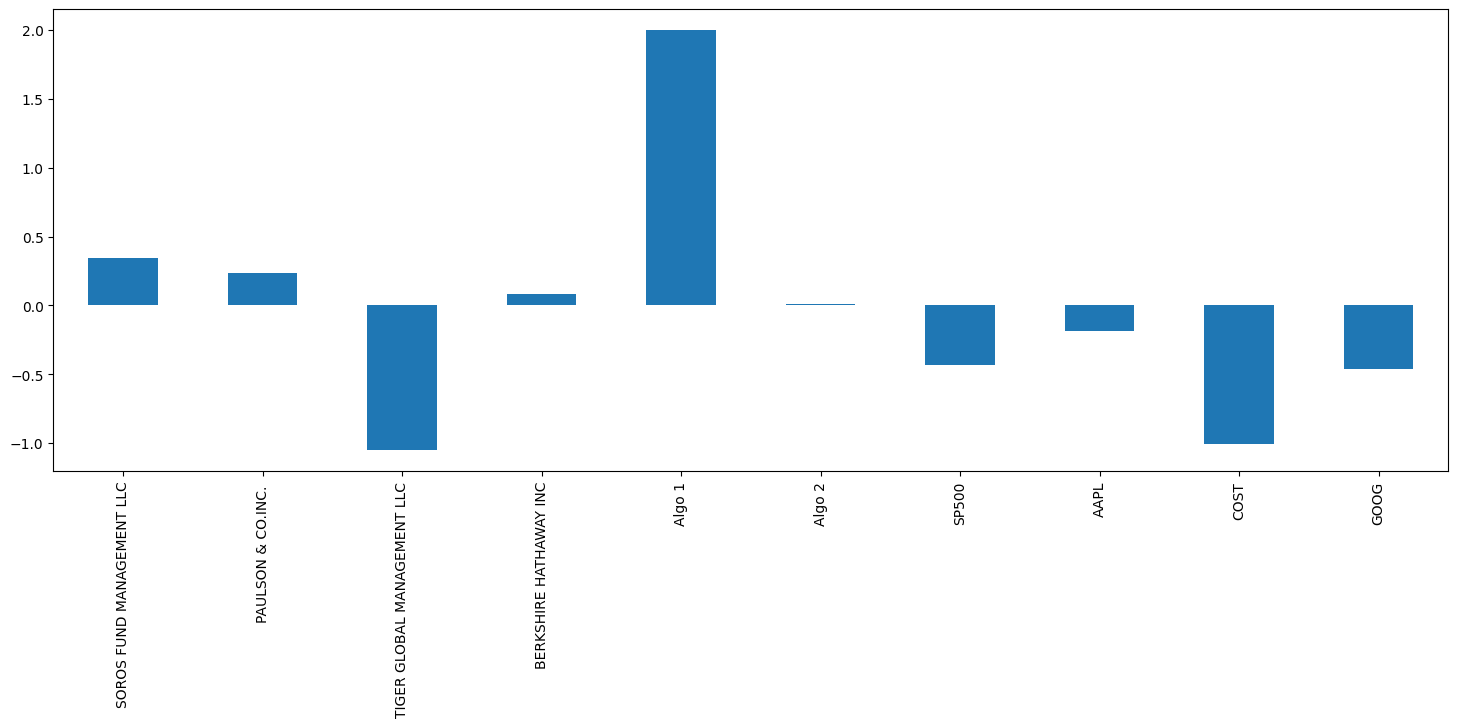

In [448]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(figsize=(18,6), kind='bar')

### How does your portfolio do?

From the Sharpe ratios alone, my portfolios AAPL,COST and GOOG indicate a negative risk-adjusted return  which implies the investment may not be compensating for the level of risk. 